In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from textutils import TextProcessor

### Prepare data 

In [2]:
TextProcessor.preprocess_folder('data/greek/', lang='el_ext', join=False, remove_diacritics=True)

Try to preprocess documents in data/greek/
	---> data/greek//all.txt
Files are successfully processed to data/greek//processed


In [7]:
TextProcessor.preprocess_folder('data/greek/chapters/', lang='el_ext', join=False, remove_diacritics=True)

Try to preprocess documents in data/greek/chapters/
	---> data/greek/chapters//1.txt
	---> data/greek/chapters//10.txt
	---> data/greek/chapters//11.txt
	---> data/greek/chapters//12.txt
	---> data/greek/chapters//13.txt
	---> data/greek/chapters//14.txt
	---> data/greek/chapters//15.txt
	---> data/greek/chapters//16.txt
	---> data/greek/chapters//17.txt
	---> data/greek/chapters//18.txt
	---> data/greek/chapters//19.txt
	---> data/greek/chapters//2.txt
	---> data/greek/chapters//20.txt
	---> data/greek/chapters//21.txt
	---> data/greek/chapters//22.txt
	---> data/greek/chapters//3.txt
	---> data/greek/chapters//4.txt
	---> data/greek/chapters//5.txt
	---> data/greek/chapters//6.txt
	---> data/greek/chapters//7.txt
	---> data/greek/chapters//8.txt
	---> data/greek/chapters//9.txt
Files are successfully processed to data/greek/chapters//processed


### Work with data 

In [3]:
with open('data/greek/processed/all.txt', 'r') as greek_file:
    text = greek_file.read().replace('\n', '').decode('utf-8')

In [6]:
print len(text)
print text[:985]

46032
αποκαλυψιςιησουχριστουηνεδωκεναυτωοθεοςδειξαιτοιςδουλοιςαυτουαδειγενεσθαιενταχεικαιεσημανεναποστειλαςδιατουαγγελουαυτουτωδουλωαυτουιωαννηοςεμαρτυρησεντονλογοντουθεουκαιτηνμαρτυριανιησουχριστουοσαειδενμακαριοςοαναγινωσκωνκαιοιακουοντεςτουςλογουςτηςπροφητειαςκαιτηρουντεςταεναυτηγεγραμμεναογαρκαιροςεγγυςιωαννηςταιςεπταεκκλησιαιςταιςεντηασιαχαριςυμινκαιειρηνηαποοωνκαιοηνκαιοερχομενοςκαιαποτωνεπταπνευματωναενωπιοντουθρονουαυτουκαιαποιησουχριστουομαρτυςοπιστοςοπρωτοτοκοςτωννεκρωνκαιοαρχωντωνβασιλεωντηςγηςτωαγαπωντιημαςκαιλυσαντιημαςεκτωναμαρτιωνημωνεντωαιματιαυτουκαιεποιησενημαςβασιλειανιερειςτωθεωκαιπατριαυτουαυτωηδοξακαιτοκρατοςειςτουςαιωναςτωναιωνωναμηνιδουερχεταιμετατωννεφελωνκαιοψεταιαυτονπαςοφθαλμοςκαιοιτινεςαυτονεξεκεντησανκαικοψονταιεπαυτονπασαιαιφυλαιτηςγηςναιαμηνεγωειμιτοαλφακαιτοωλεγεικυριοςοθεοςοωνκαιοηνκαιοερχομενοςοπαντοκρατωρεγωιωαννηςοαδελφοςυμωνκαισυγκοινωνοςεντηθλιψεικαιβασιλειακαιυπομονηενιησουεγενομηνεντηνησωτηκαλουμενηπατμωδιατονλογοντουθεουκαιτηνμαρτυριαν


### Task 1. Chapters and the whole text letters distribution 

In [26]:
def draw_ordered_dict(dct, size=(10, 8)):
    non_zero_items = np.array(dct)[:,0]
    non_zero_values = np.array(dct)[:,1].astype(np.float64)
    
    plt.figure(figsize=size)
    ax = sns.barplot(x=non_zero_items, y=non_zero_values, color="#666699")
    
    ax.set_ylabel('Probabilities')
    ax.set_title('Text symbols distribution')
    ax.set_xticklabels(non_zero_items)
    
    plt.show()

In [45]:
def save_dict_to_file(dct, filename):
    data = pd.DataFrame(columns=['letter', 'proba'])
    data['letter'] = np.array(dct)[:,0]
    data['proba'] = np.array(dct)[:,1].astype(np.float64)
    data.to_csv('data/greek/results/' + filename + '.csv', encoding='utf-8', index=False, float_format='%.9f')

#### The whole text

In [19]:
from textutils import TextUtils

text_normalized_dict_1 = TextUtils.get_normalized_dict (
    TextUtils.get_n_gram_dict(text.encode('utf-8'), 1, lang='el')
)
text_ordered_dict_1 = TextUtils.get_ordered_dict(text_normalized_dict_1, by='value', reverse=True)

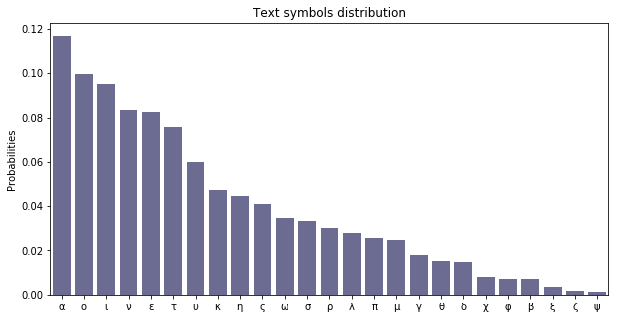

In [27]:
draw_ordered_dict(text_ordered_dict_1, (10, 5))

In [46]:
save_dict_to_file(text_ordered_dict_1, 'all_1')

In [47]:
text_normalized_dict_2 = TextUtils.get_normalized_dict (
    TextUtils.get_n_gram_dict(text.encode('utf-8'), 2, lang='el')
)
text_ordered_dict_2 = TextUtils.get_ordered_dict(text_normalized_dict_2, by='value', reverse=True)
save_dict_to_file(text_ordered_dict_2, 'all_2')

#### Chapters

In [62]:
chapters = !ls 'data/greek/chapters/'
chapters.remove('processed')
chapters = ['data/greek/chapters/' + chapter for chapter in chapters]

In [77]:
for chapter_path in chapters:
    chapter_num = chapter_path[chapter_path.rfind('/') + 1 : chapter_path.find('.txt')]
    with open(chapter_path, 'r') as chapter_file:
        chapter_text = chapter_file.read().replace('\n', '').decode('utf-8')
    
    chapter_norm_dict_1 = TextUtils.get_normalized_dict (
        TextUtils.get_n_gram_dict(text.encode('utf-8'), 1, lang='el')
    )
    chapter_ordered_dict_1 = TextUtils.get_ordered_dict(chapter_norm_dict_1, by='value', reverse=True)
    save_dict_to_file(chapter_ordered_dict_1, 'chapter_' + chapter_num + '_distr_1')

In [78]:
for chapter_path in chapters:
    chapter_num = chapter_path[chapter_path.rfind('/') + 1 : chapter_path.find('.txt')]
    with open(chapter_path, 'r') as chapter_file:
        chapter_text = chapter_file.read().replace('\n', '').decode('utf-8')
    
    chapter_norm_dict_2 = TextUtils.get_normalized_dict (
        TextUtils.get_n_gram_dict(text.encode('utf-8'), 2, lang='el')
    )
    chapter_ordered_dict_2 = TextUtils.get_ordered_dict(chapter_norm_dict_2, by='value', reverse=True)
    save_dict_to_file(chapter_ordered_dict_2, 'chapter_' + chapter_num + '_distr_2')

### Task 2.

In [85]:
window_size = 5000
step = 500

In [99]:
current_text = text[:window_size]

current_norm_dict = TextUtils.get_normalized_dict (
    TextUtils.get_n_gram_dict(current_text.encode('utf-8'), 2, lang='el')
)
current_dict = TextUtils.get_ordered_dict(current_norm_dict, by='value', reverse=True)

In [100]:
distances = []
for i in range(step, len(text), step):
    previous_text = current_text[:]
    previous_dict = current_dict[:]

    left = i
    right = min(len(text), i + window_size)

    if right - left < window_size:
        break

    current_text = text[left:right]
    current_norm_dict = TextUtils.get_normalized_dict (
        TextUtils.get_n_gram_dict(current_text.encode('utf-8'), 2, lang='el')
    )
    current_dict = TextUtils.get_ordered_dict(current_norm_dict, by='value', reverse=True)
    
    distances.append(TextUtils.l1_distance(
        np.array(current_dict)[:,1].astype(np.float64),
        np.array(previous_dict)[:,1].astype(np.float64)
    ))

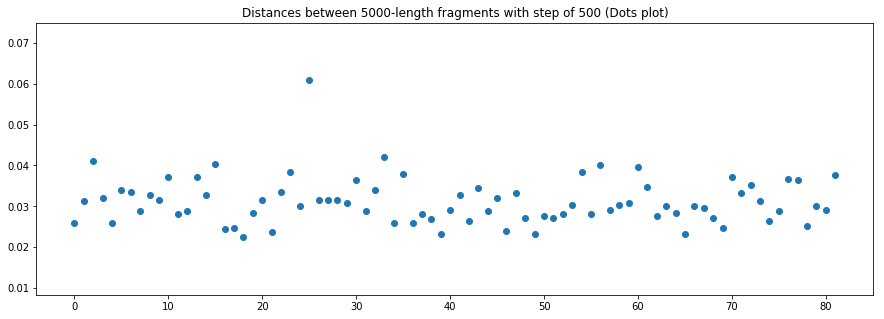

In [142]:
plt.figure(figsize=(15, 5))
plt.title('Distances between 5000-length fragments with step of 500 (Dots plot)')
plt.scatter([i for i in range(len(distances))], distances)
plt.show()

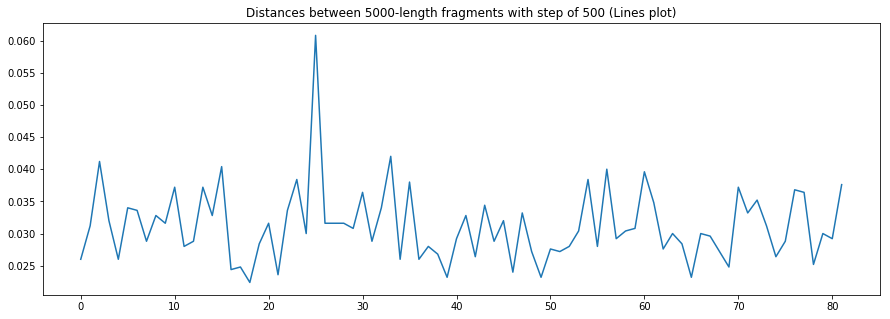

In [143]:
plt.figure(figsize=(15, 5))
plt.title('Distances between 5000-length fragments with step of 500 (Lines plot)')
plt.plot(distances)
plt.show()

In [104]:
np.savetxt('data/greek/results/500step_dist.csv', distances, fmt='%.9f')

### Task 3.  

In [105]:
import re

In [114]:
print text_ordered_dict_1[0][0], text_ordered_dict_1[0][1]
print text_ordered_dict_1[1][0], text_ordered_dict_1[1][1]

α 0.116853493222
ο 0.0996697949253


In [115]:
alpha_indexes = [m.start() for m in re.finditer(u'α', text)]
omicron_indexes = [m.start() for m in re.finditer(u'ο', text)]

In [120]:
print alpha_indexes[:15]
print omicron_indexes[:15]

[0, 4, 30, 43, 56, 61, 71, 76, 81, 87, 91, 99, 103, 107, 114]
[2, 13, 20, 34, 37, 46, 50, 53, 59, 93, 105, 112, 117, 122, 129]


In [121]:
alpha_distances = np.ediff1d(alpha_indexes)
omicron_distances = np.ediff1d(omicron_indexes)

In [122]:
print alpha_distances[:15]
print omicron_distances[:15]

[ 4 26 13 13  5 10  5  5  6  4  8  4  4  7 12]
[11  7 14  3  9  4  3  6 34 12  7  5  5  7  8]


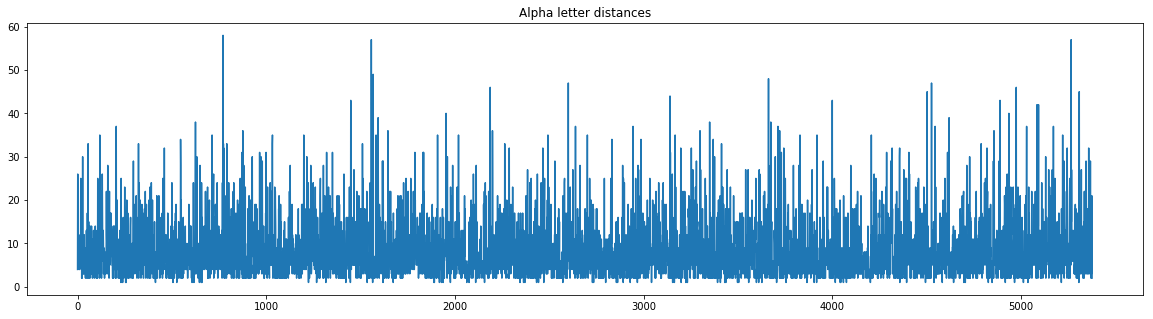

In [144]:
plt.figure(figsize=(20, 5))
plt.title('Alpha letter distances')
plt.plot(alpha_distances)
plt.show()

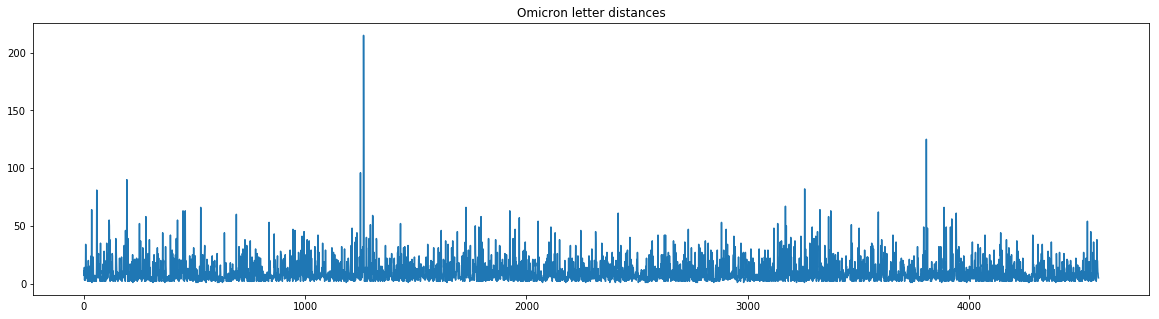

In [146]:
plt.figure(figsize=(20, 5))
plt.title('Omicron letter distances')
plt.plot(omicron_distances)
plt.show()

In [147]:
np.savetxt('data/greek/results/alpha_distances.csv', alpha_distances, fmt='%.9f')
np.savetxt('data/greek/results/omicron_distances.csv', omicron_distances, fmt='%.9f')